In [7]:
#Karan Veer Singh
#Internship Task 
#Cognifyz Tech

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data_file = 'Dataset .csv'

rest_df=pd.read_csv(data_file)
print("Dataset Shape:",rest_df.shape)
print("\nFirst 7 rows:")
rest_df.head()

Dataset Shape: (9551, 21)

First 7 rows:


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
print("Column Info:")
print(rest_df.info())
print("\n"+"="*50)
print("Missing Values:")
print(rest_df.isnull().sum())
print("\n"+"="*50)
print("Unique values in key columns:")
print(f"Table booking options: {rest_df['Has Table booking'].unique()}")
print(f"Online delivery options: {rest_df['Has Online delivery'].unique()}")
print(f"Price ranges: {sorted(rest_df['Price range'].unique())}")

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch t

In [9]:
print("Rating Statistics:")
print(rest_df['Aggregate rating'].describe())
print("\n"+"="*40)
print("Price Range Distribution:")
print(rest_df['Price range'].value_counts().sort_index())
print("\n"+"="*40)
print("Currency Distribution:")
print(rest_df['Currency'].value_counts().head())

Rating Statistics:
count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

Price Range Distribution:
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

Currency Distribution:
Currency
Indian Rupees(Rs.)    8652
Dollar($)              482
Pounds(��)              80
Brazilian Real(R$)      60
Emirati Diram(AED)      60
Name: count, dtype: int64


In [10]:
tb_counts=rest_df['Has Table booking'].value_counts()
tb_pct=rest_df['Has Table booking'].value_counts(normalize=True)*100

print("TABLE BOOKING ANALYSIS")
print("="*30)
print("Raw counts:")
print(tb_counts)
print("\nPercentages:")
for idx,val in tb_pct.items():
    print(f"{idx}: {val:.2f}%")

tb_yes_pct=tb_pct.get('Yes',0)
tb_no_pct=tb_pct.get('No',0)

TABLE BOOKING ANALYSIS
Raw counts:
Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

Percentages:
No: 87.88%
Yes: 12.12%


In [11]:
od_counts=rest_df['Has Online delivery'].value_counts()
od_pct=rest_df['Has Online delivery'].value_counts(normalize=True)*100

print("ONLINE DELIVERY ANALYSIS")
print("="*30)
print("Raw counts:")
print(od_counts)
print("\nPercentages:")
for idx,val in od_pct.items():
    print(f"{idx}: {val:.2f}%")

od_yes_pct=od_pct.get('Yes',0)
od_no_pct=od_pct.get('No',0)

ONLINE DELIVERY ANALYSIS
Raw counts:
Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

Percentages:
No: 74.34%
Yes: 25.66%


In [12]:
both_services=rest_df[(rest_df['Has Table booking']=='Yes')& 
                     (rest_df['Has Online delivery']=='Yes')]
neither_service=rest_df[(rest_df['Has Table booking']=='No')& 
                       (rest_df['Has Online delivery']=='No')]

print("COMBINED SERVICES ANALYSIS")
print("="*35)
print(f"Restaurants with BOTH services: {len(both_services)} ({len(both_services)/len(rest_df)*100:.2f}%)")
print(f"Restaurants with NEITHER service: {len(neither_service)} ({len(neither_service)/len(rest_df)*100:.2f}%)")
print(f"Total restaurants analyzed: {len(rest_df)}")

COMBINED SERVICES ANALYSIS
Restaurants with BOTH services: 435 (4.55%)
Restaurants with NEITHER service: 6377 (66.77%)
Total restaurants analyzed: 9551


In [13]:
tb_ratings=rest_df.groupby('Has Table booking')['Aggregate rating'].agg(['mean','median','count'])
tb_ratings.columns=['Avg_Rating','Median_Rating','Count']

print("RATING ANALYSIS BY TABLE BOOKING")
print("="*40)
print(tb_ratings)

if 'Yes' in tb_ratings.index and 'No' in tb_ratings.index:
    rating_diff=tb_ratings.loc['Yes','Avg_Rating']-tb_ratings.loc['No','Avg_Rating']
    print(f"\nRating difference (Yes - No): {rating_diff:.3f}")
    print(f"Better rating group: {'Table Booking' if rating_diff>0 else 'No Table Booking'}")

RATING ANALYSIS BY TABLE BOOKING
                   Avg_Rating  Median_Rating  Count
Has Table booking                                  
No                   2.559359            3.1   8393
Yes                  3.441969            3.6   1158

Rating difference (Yes - No): 0.883
Better rating group: Table Booking


In [14]:
od_price=pd.crosstab(rest_df['Price range'],rest_df['Has Online delivery'],normalize='index')*100
od_price_counts=pd.crosstab(rest_df['Price range'],rest_df['Has Online delivery'])

print("ONLINE DELIVERY BY PRICE RANGE")
print("="*40)
print("Percentages:")
print(od_price.round(2))
print("\nAbsolute counts:")
print(od_price_counts)

if 'Yes' in od_price.columns:
    best_price_od=od_price['Yes'].idxmax()
    best_pct=od_price.loc[best_price_od,'Yes']
    print(f"\nHighest online delivery availability: Price Range {best_price_od} ({best_pct:.1f}%)")

ONLINE DELIVERY BY PRICE RANGE
Percentages:
Has Online delivery     No    Yes
Price range                      
1                    84.23  15.77
2                    58.69  41.31
3                    70.81  29.19
4                    90.96   9.04

Absolute counts:
Has Online delivery    No   Yes
Price range                    
1                    3743   701
2                    1827  1286
3                     997   411
4                     533    53

Highest online delivery availability: Price Range 2 (41.3%)


In [15]:
summary_data={
    'Service':['Table Booking','Online Delivery'],
    'Available_Count':[tb_counts.get('Yes',0),od_counts.get('Yes',0)],
    'Not_Available_Count':[tb_counts.get('No',0),od_counts.get('No',0)],
    'Available_Percentage':[tb_yes_pct,od_yes_pct],
    'Not_Available_Percentage':[tb_no_pct,od_no_pct]
}

summary_df=pd.DataFrame(summary_data)
summary_df=summary_df.round(2)

print("FINAL SUMMARY TABLE")
print("="*25)
print(summary_df.to_string(index=False))

FINAL SUMMARY TABLE
        Service  Available_Count  Not_Available_Count  Available_Percentage  Not_Available_Percentage
  Table Booking             1158                 8393                 12.12                     87.88
Online Delivery             2451                 7100                 25.66                     74.34


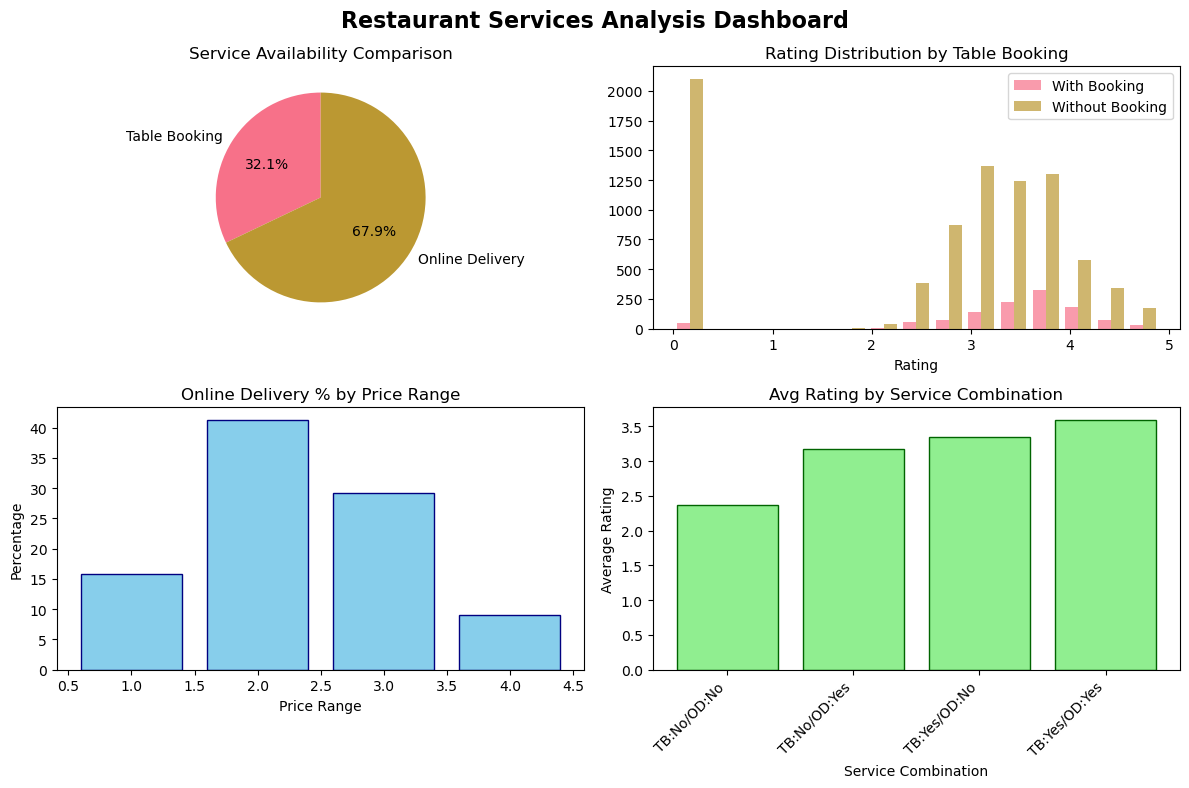

In [16]:
plt.style.use('default')
sns.set_palette("husl")
fig_size=(12,8)

fig,axes=plt.subplots(2,2,figsize=fig_size)
fig.suptitle('Restaurant Services Analysis Dashboard',fontsize=16,fontweight='bold')

services_data=[tb_yes_pct,od_yes_pct]
service_labels=['Table Booking','Online Delivery']
axes[0,0].pie(services_data,labels=service_labels,autopct='%1.1f%%',startangle=90)
axes[0,0].set_title('Service Availability Comparison')

tb_yes_ratings=rest_df[rest_df['Has Table booking']=='Yes']['Aggregate rating']
tb_no_ratings=rest_df[rest_df['Has Table booking']=='No']['Aggregate rating']
axes[0,1].hist([tb_yes_ratings,tb_no_ratings],alpha=0.7,label=['With Booking','Without Booking'],bins=15)
axes[0,1].set_title('Rating Distribution by Table Booking')
axes[0,1].set_xlabel('Rating')
axes[0,1].legend()

price_ranges=sorted(rest_df['Price range'].unique())
od_percentages=[od_price.loc[pr,'Yes'] if pr in od_price.index and 'Yes' in od_price.columns else 0 
                for pr in price_ranges]
axes[1,0].bar(price_ranges,od_percentages,color='skyblue',edgecolor='navy')
axes[1,0].set_title('Online Delivery % by Price Range')
axes[1,0].set_xlabel('Price Range')
axes[1,0].set_ylabel('Percentage')

service_combo=rest_df.groupby(['Has Table booking','Has Online delivery'])['Aggregate rating'].mean()
combo_labels=[f"TB:{tb}/OD:{od}" for (tb,od) in service_combo.index]
axes[1,1].bar(range(len(service_combo)),service_combo.values,color='lightgreen',edgecolor='darkgreen')
axes[1,1].set_title('Avg Rating by Service Combination')
axes[1,1].set_xlabel('Service Combination')
axes[1,1].set_ylabel('Average Rating')
axes[1,1].set_xticks(range(len(combo_labels)))
axes[1,1].set_xticklabels(combo_labels,rotation=45,ha='right')

plt.tight_layout()
plt.show()

In [18]:
insights=[]

insights.append(f" SERVICE AVAILABILITY:")
insights.append(f"   • {tb_yes_pct:.1f}% of restaurants offer table booking")
insights.append(f"   • {od_yes_pct:.1f}% of restaurants offer online delivery")

if 'Yes' in tb_ratings.index and 'No' in tb_ratings.index:
    tb_yes_avg=tb_ratings.loc['Yes','Avg_Rating']
    tb_no_avg=tb_ratings.loc['No','Avg_Rating']
    insights.append(f"\n RATING ANALYSIS:")
    insights.append(f"   • Restaurants WITH table booking: {tb_yes_avg:.2f} avg rating")
    insights.append(f"   • Restaurants WITHOUT table booking: {tb_no_avg:.2f} avg rating")
    insights.append(f"   • Rating advantage: {abs(tb_yes_avg-tb_no_avg):.3f} points")

if 'Yes' in od_price.columns:
    best_price_range=od_price['Yes'].idxmax()
    best_percentage=od_price.loc[best_price_range,'Yes']
    worst_price_range=od_price['Yes'].idxmin()
    worst_percentage=od_price.loc[worst_price_range,'Yes']
    
    insights.append(f"\n PRICE RANGE ANALYSIS:")
    insights.append(f"   • Highest online delivery: Price Range {best_price_range} ({best_percentage:.1f}%)")
    insights.append(f"   • Lowest online delivery: Price Range {worst_price_range} ({worst_percentage:.1f}%)")

print("KEY INSIGHTS & FINDINGS")
print("="*30)
for insight in insights:
    print(insight)

print(f"\n Analysis completed on {len(rest_df)} restaurants")
print("="*50)

KEY INSIGHTS & FINDINGS
 SERVICE AVAILABILITY:
   • 12.1% of restaurants offer table booking
   • 25.7% of restaurants offer online delivery

 RATING ANALYSIS:
   • Restaurants WITH table booking: 3.44 avg rating
   • Restaurants WITHOUT table booking: 2.56 avg rating
   • Rating advantage: 0.883 points

 PRICE RANGE ANALYSIS:
   • Highest online delivery: Price Range 2 (41.3%)
   • Lowest online delivery: Price Range 4 (9.0%)

 Analysis completed on 9551 restaurants
